In [2]:
#Load Packages
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
#Read in Players and Sessions after files were uploaded to GitHub and pulled into local repo
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Initial Data Wrangling, Tidying, and Analysis

In [4]:
#Tidy Players by changing experience and gender into factor columns for categorical analysis
players_tidy <- players|>
    mutate(experience = as_factor(experience), gender = as_factor(gender))
#Tidy Sessions by changing start_time and end_time to better date/time formats and adding session length
sessions_tidy <- sessions|> mutate(start_time = dmy_hm(start_time), end_time=dmy_hm(end_time))|>
    mutate(session_length_mins = as.numeric(end_time - start_time))

In [10]:
#Combine data sets
combined_tidy <- inner_join(players_tidy, sessions_tidy)
combined_tidy

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_time,end_time,original_start_time,original_end_time,session_length_mins
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-08-08 00:21:00,2024-08-08 01:35:00,1.72308e+12,1.72308e+12,74
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-09-09 22:30:00,2024-09-09 22:37:00,1.72592e+12,1.72592e+12,7
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-08-08 02:41:00,2024-08-08 03:25:00,1.72308e+12,1.72309e+12,44
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-09-10 15:07:00,2024-09-10 15:29:00,1.72598e+12,1.72598e+12,22
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-05-05 22:21:00,2024-05-05 23:17:00,1.71495e+12,1.71495e+12,56
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-04-06 22:24:00,2024-04-06 23:33:00,1.71244e+12,1.71245e+12,69
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-04-20 20:46:00,2024-04-20 21:48:00,1.71365e+12,1.71365e+12,62
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-06-15 16:37:00,2024-06-15 18:37:00,1.71847e+12,1.71848e+12,120
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-05-05 23:40:00,2024-05-06 00:55:00,1.71495e+12,1.71496e+12,75


In [8]:
#Look at player characteristics with summary function
players_summary <- summary(players_tidy)
players_summary

    experience subscribe       hashedEmail         played_hours    
 Pro     :14   Mode :logical   Length:196         Min.   :  0.000  
 Veteran :48   FALSE:52        Class :character   1st Qu.:  0.000  
 Amateur :63   TRUE :144       Mode  :character   Median :  0.100  
 Regular :36                                      Mean   :  5.846  
 Beginner:35                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
                                                                   
     name                         gender         Age       
 Length:196         Male             :124   Min.   : 9.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Non-binary       : 15   Median :19.00  
                    Prefer not to say: 11   Mean   :21.14  
                    Agender          :  2   3rd Qu.:22.75  
                    Two-Spirited     :  6   Max.   :58.00  
                    Other           

In [8]:
#Create Table for mean age and played hours from players_tidy
players_means <- summarise(players_tidy, mean_age = round(mean(Age, na.rm = TRUE), 2), 
                           mean_played_hours = round(mean(played_hours), 2))
players_means

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


In [12]:
#Look at characteristics by session with summary function, where one player may have multiple observations
combined_summary <- summary(combined_tidy)
combined_summary

    experience  subscribe       hashedEmail         played_hours   
 Pro     : 39   Mode :logical   Length:1535        Min.   :  0.00  
 Veteran : 51   FALSE:103       Class :character   1st Qu.: 32.00  
 Amateur :820   TRUE :1432      Mode  :character   Median : 56.10  
 Regular :519                                      Mean   : 98.57  
 Beginner:106                                      3rd Qu.:178.20  
                                                   Max.   :223.10  
                                                                   
     name                         gender          Age       
 Length:1535        Male             :1015   Min.   : 9.00  
 Class :character   Female           : 382   1st Qu.:17.00  
 Mode  :character   Non-binary       : 104   Median :18.00  
                    Prefer not to say:  19   Mean   :19.43  
                    Agender          :  10   3rd Qu.:23.00  
                    Two-Spirited     :   4   Max.   :58.00  
                    Other    

## Data Description
The combined data shows 1535 total observations, representing 1535 individual play sessions across the 196 players from the players dataset. One aspect of the data is that the majority of the player data is categorical, which may prove to be a limitation if we want to perform predictive analysis like classification or regression which requires numerical variables.

The players data includes player characteristic variables such as:
- age (double)
- gender (factor)
- experience level (factor)
- subscribed (logical, subscribed yes/no)
- total playing time (all sessions per player; double)
- hashed emails (player IDs; character)
- names (IDs; character)
### Player Characteristics
|Total Players|Experience Level|Players|Gender|Players|Subscribed|Players|Age Range|Years|Total Played Time|Hours|
|-------------|----------------|-------|------|-------|----------|-------|---------|-----|---------------|-----|
|196|Pro|14|Male|124|Yes|144|Minimum Age|9|Minimum Hours|0.00|
| |Veteren|48|Female|37|No|52|1st Quartile|17.00|1st Quartile|0.00|
| |Amateur|63|Non-binary|15| | |Median Age|19|Median Hours|0.10|
| |Regular|36|Prefer not to say|11| | |Mean Age|21.14|Mean Hours|5.85|
| |Beginner|35|Agender|2| | |3rd Quartile|22.75|3rd Quartile|0.60|
| |        |   |Two_spirited|6| | |Maximum Age|58|Maximum Hours|223.10|
| |        |   |Other|1| | | | | | |
### Combined Data - Player Analysis by Session
|Total Sessions|Experience Level|Sessions Played|Gender|Sessions Played|
|-------------|----------------|-------|------|-------|
|1535|Pro|39|Male|1015|
| |Veteren|51|Female|382|
| |Amateur|820|Prefer not to say|19|
| |Regular|519|Non-binary|104|
| |Beginner|106|Agender|10|
| |        |   |Two_spirited|4|
| |        |   |Other|1|

The sessions data includes variables with observations for individual play sessions, including: 
- hashed email (IDs; character)
- start time (date and military time; dttm)
- end time (date and military time; dttm)
- original start time (UNIX; double)
- original end time (UNIX; double)

I also added a session length variable (minutes; double) to the combined data set by converting and subtracting start_time from end_time.

### Combined Data - Session Analysis
|Session Stat|Starts - Date/Time|Ends - Date/Time|Starts - UNIX(ms)|Ends - UNIX(ms)|Session Durations(mins)|
|------------|------------------|----------------|-----------------|---------------|-----------------------|
|Minimum|2024-04-06 09:27:00.00|2024-04-06 09:31:00.00|1.71e+12|1.71e+12|3.00| 
|1st Qu.|2024-05-20 20:28:00.00|2024-05-20 21:37:00.00|1.72e+12|1.72e+12|9.00|
|Median|2024-06-24 02:51:00.00|2024-06-23 22:04:00.00|1.72e+12|1.72e+12|30.00|
|Mean|2024-06-24 03:54:03.51|2024-06-24 02:26:18.03|1.72e+12|1.72e+12|50.86|
|3rd Qu.|2024-07-25 06:56:00.00|2024-07-25 07:00:00.00|1.72e+12|1.72e+12|73.00| 
|Maximum|2024-09-26 06:09:00.00|2024-09-26 07:39:00.00|1.73e+12|1.73e+12|259.00|



## Question and Exploratory Visualizations
In the realm of broad question 1 aiming to use player characteristics to predict subscription to a gaming newsletter, I will investigate the following: Can experience level, age, and total played hours predict subscription to the gaming newsletter?






Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


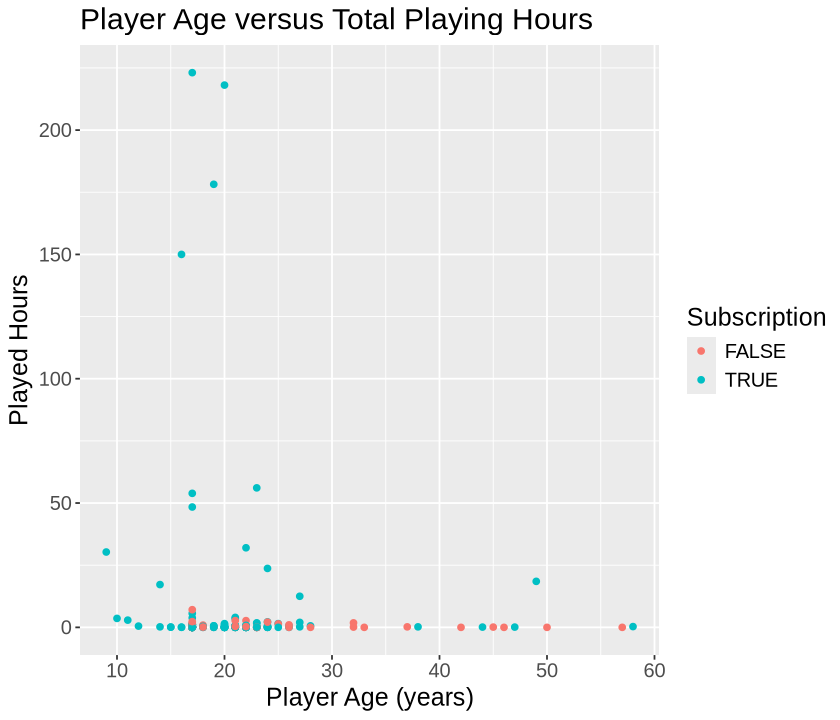

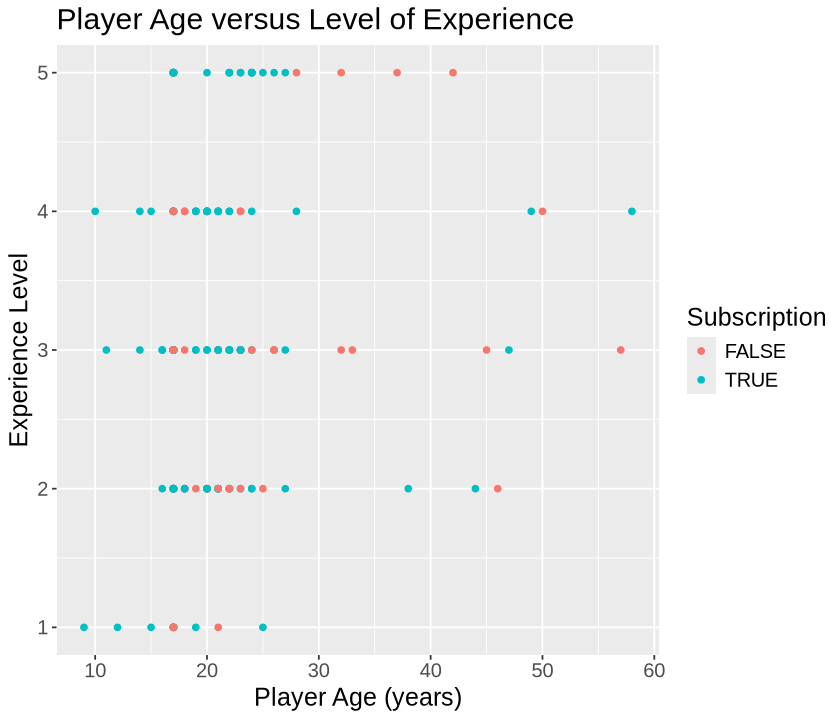

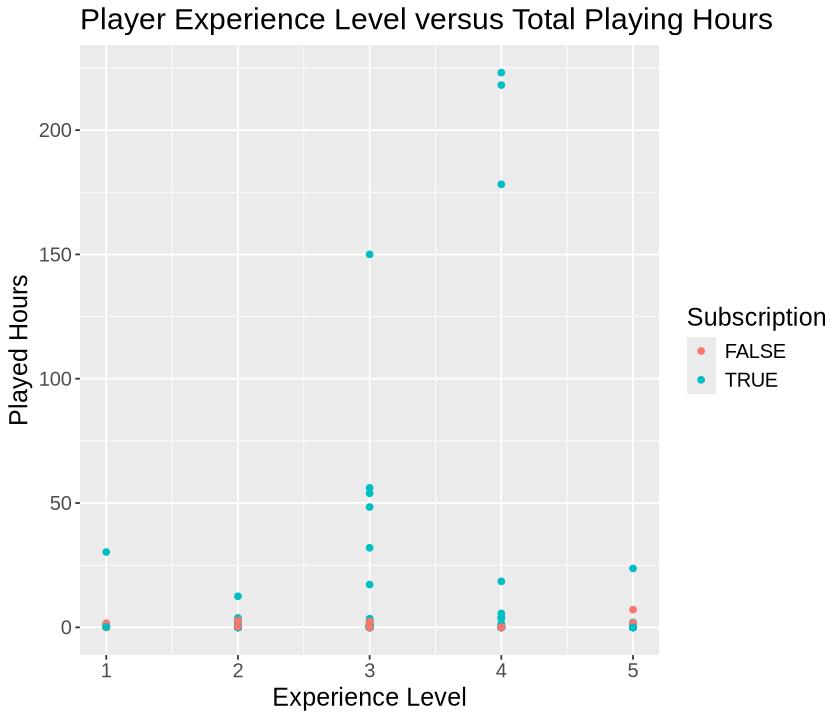

In [49]:
#Use ordinal encoding to change experience level to a numerical variable 
players_exp_ord <- players_tidy |>
    mutate(experience = fct_recode(experience, "1"="Beginner", 
                                   "2"="Regular", "3"="Amateur","4"="Veteran","5"="Pro"))|>
    mutate(experience = as.numeric(experience))|>
    select(subscribe,experience,Age,played_hours)

#Plot each combination of predictor variables to look for relationships
options(repr.plot.height=6, repr.plot.width=7)

age_hours_plot <- players_exp_ord |>
    ggplot(aes(x=Age, y=played_hours, color=subscribe))+geom_point()+
    labs(x="Player Age (years)", y="Played Hours", color="Subscription")+
    ggtitle("Player Age versus Total Playing Hours")+
    theme(text=element_text(size=15))
age_hours_plot

age_exp_plot <- players_exp_ord |>
    ggplot(aes(x=Age, y=experience, color=subscribe))+geom_point()+
    labs(x="Player Age (years)", y="Experience Level", color="Subscription")+
    ggtitle("Player Age versus Level of Experience")+
    theme(text=element_text(size=15))
age_exp_plot

exp_hours_plot <- players_exp_ord |>
    ggplot(aes(x=experience, y=played_hours, color=subscribe))+geom_point()+
    labs(x="Experience Level", y="Played Hours", color="Subscription")+
    ggtitle("Player Experience Level versus Total Playing Hours")+
    theme(text=element_text(size=15))
exp_hours_plot

## Question Revisited and Method
As I am aiming to predict subscription as a categorical variable with two outcomes, I would use K nearest neighbors classification. Based on the above visualizations, I do not expect experience level to make much of an impact on the prediction of subscription status, whereas a younger age and a higher total played hours does seem to be predictive of having subscribed to the newsletter. However, it may be valuable to compare accuracy measures between two predicitive algorithms, one which includes experience and one which does not. As the priority of the broad question is to find subscribers, I will also look at precision to maximize correct identifications of subscribers.

The model will require that the predictor variables are standardized, since playing hours is on a larger scale than age and experience level and will currently be overweighted in the predictions. I expect there may be a limitation in the fact that experience was originally a categorical variable which I converted to ordinal numerical equivilents, which may not reflect experience level in their relative scales. 

As the players dataset is relatively small with 196 players, I will compare both a 90/10 and an 80/20 training/testing data split for accuracy and precision, as small datasets generally need more training data to perform well. I will also perform a standard 5-fold cross-validation to determine the most appropriate K value. 



